# Download all hourly data 1980 ~ 2020 from Tsukuba station and combine to one file for rainfall and temperature

# Assume we have downloaded AMeDAS data for Tsukuba station 
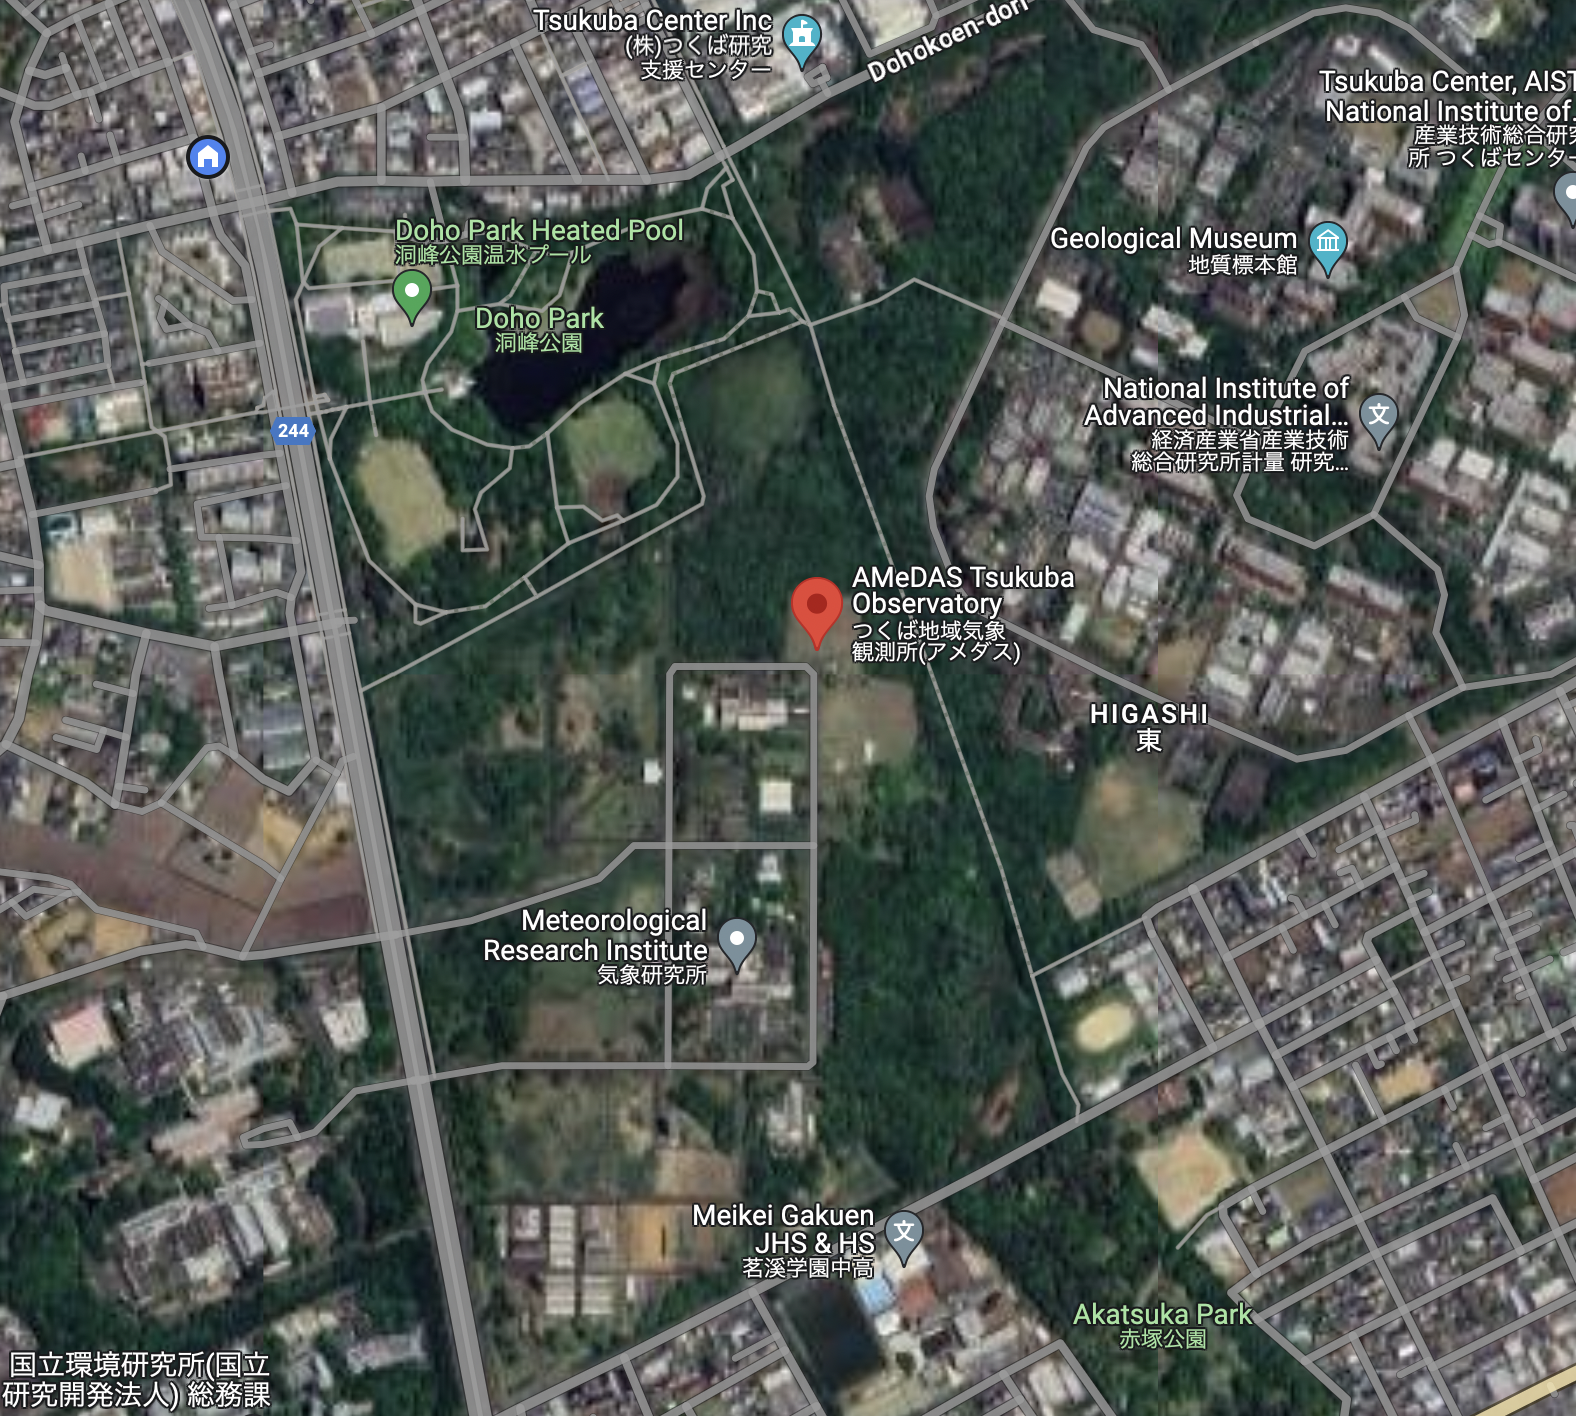

In [ ]:
from download_time_series import download_amedas
opath = 'data_download/' 
point = '47646' # Tsukuba station
date_range = pd.date_range('2020-12-28', '2020-12-31', freq='d')
for date in date_range:
    dat, link = download_amedas(point, date, opath, 'hourly' )
    time.sleep(0.2)

## Data is download in daily-basic: check data_download/
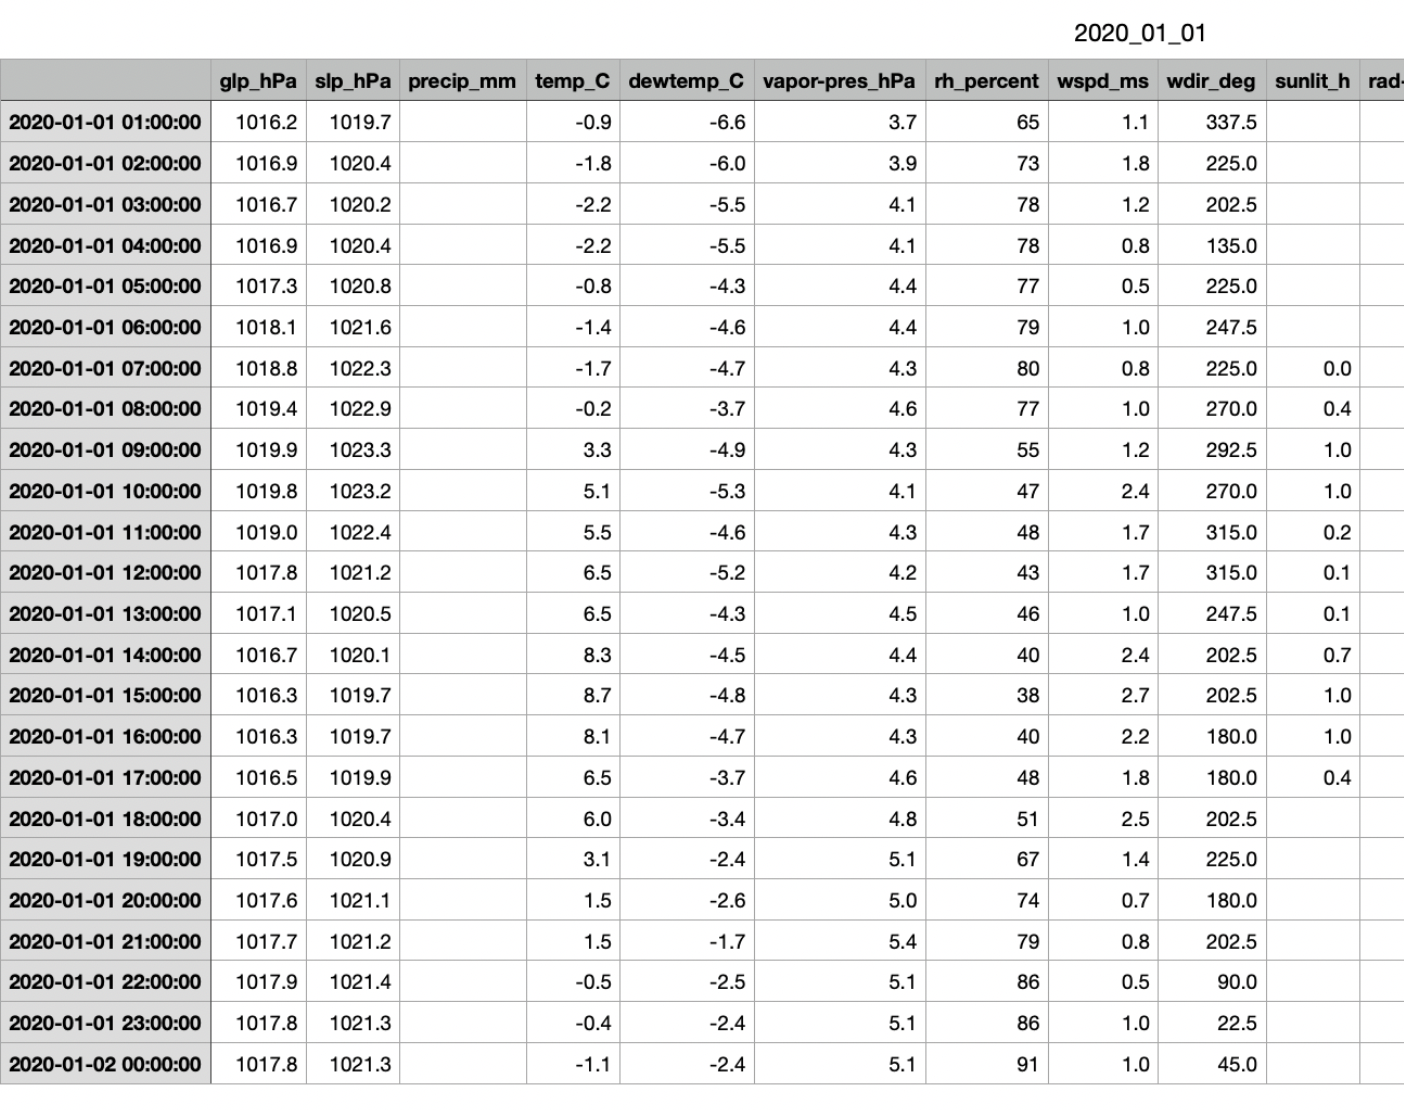

# Combine data

In [ ]:
# list-up all files
point = '47646'
files = sorted(glob.glob('data_download/hourly/'+point+'/*'))
print(files[:5])
print(files[-5:])

In [ ]:
# read each file, only get temperature and precipitation

dd = []
for f in files[:][:]:
    df = pd.read_csv(f, index_col=0, parse_dates=True)
    t = df[['temp_C', 'precip_mm' ] ]
    dd.append(t)

# concat all data, replace -999 to NaN 
do = pd.concat(dd).replace(-999,np.NaN) 

#
# save data output director (odir), 
# create this directory if not exist
odir = 'combined_hourly/'+point+'/'
if not os.path.isdir(odir): os.makedirs(odir)

ofile = odir + 'all.csv'

print(ofile)
do.to_csv(ofile)